# SkinDeep

In [1]:
!git clone https://github.com/vijishmadhavan/SkinDeep.git SkinDeep

fatal: destination path 'SkinDeep' already exists and is not an empty directory.


In [1]:
cd SkinDeep

C:\Users\User\Desktop\Предметы\Д.з\Курс III\Анализ данных\Лабораторная работа №2\3\SkinDeep


In [5]:
!pip install -r colab_requirements.txt

  Using cached https://files.pythonhosted.org/packages/54/12/f965e8529658c109ec710e77c843227b1acecfc0d3b22f5082b330b78e3a/fastai-1.0.61-py3-none-any.whl

You are using pip version 19.0.3, however version 21.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.



  Using cached https://files.pythonhosted.org/packages/bd/51/7df1a3858ff0465f760b482514f1292836f8be08d84aba411b48dda72fa9/numpy-1.17.2-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/c5/16/07da3435a161ae411eef63d6c5edcf9fd11a8a11e94f60d259693b7e0804/pandas-1.1.2-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/29/66/bff24be9c0e90d56b5dac08f7dfc6733fbcfd640b5b21181086771b9fc76/torch-1.9.1-cp37-cp37m-win_amd64.whl
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\97\a9\12\41b13e8b44889ab05ec4dcc91f27da21634bacf2a0e87473b8
Successfully built bottleneck
  Stored in directory: C:\Users\User\AppData\Local

### **Restart Runtime after step 3 and go to step 4**
**Ignore errors**





# **Runtime**

* Hardware Accelerator = GPU 


In [2]:
from fastai.vision.image import Image
from fastai.vision import load_learner, show_image
from urllib.request import urlretrieve
import PIL.Image
from io import BytesIO
import torchvision.transforms as T
import requests
from torch.nn import Module
from pathlib import Path


class FeatureLoss(Module):
    def __init__(self, m_feat, layer_ids, layer_wgts):
        super().__init__()
        self.m_feat = m_feat
        self.loss_features = [self.m_feat[i] for i in layer_ids]
        self.hooks = hook_outputs(self.loss_features, detach=False)
        self.wgts = layer_wgts
        self.metric_names = ['pixel'] +\
                            [f'feat_{i}' for i in range(len(layer_ids))] +\
                            [f'gram_{i}' for i in range(len(layer_ids))]

    def make_features(self, x, clone=False):
        self.m_feat(x)
        return [(o.clone() if clone else o) for o in self.hooks.stored]

    def forward(self, input, target):
        out_feat = self.make_features(target, clone=True)
        in_feat = self.make_features(input)
        self.feat_losses = [base_loss(input, target)]
        self.feat_losses += [base_loss(f_in, f_out)*w
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.feat_losses += [base_loss(gram_matrix(f_in), gram_matrix(f_out))*w**2 * 5e3
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.metrics = dict(zip(self.metric_names, self.feat_losses))
        return sum(self.feat_losses)

    def __del__(self): self.hooks.remove()

In [3]:
MODEL_URL = "https://www.dropbox.com/s/vxgw0s7ktpla4dk/SkinDeep2.pkl?dl=1"
urlretrieve(MODEL_URL, "SkinDeep2.pkl")
path = Path(".")
learn = load_learner(path, 'SkinDeep2.pkl')

# **URL**
Type in a url to a direct link of an **high quality image**. Usually that means they'll end in .png, .jpg, etc. 

**Note** : It is a work in progress .Try it yourself, find faults and help in improving it.

Linkd to high-quality pics,Copy image address. 

https://www.businessinsider.com.au/celebrities-with-face-tattoos-photos-2020-4

https://line.17qq.com/articles/qcstcqcqx.html

https://wallpapercave.com/dwayne-johnson-hd-wallpapers

https://www.dailymail.co.uk/news/article-1332455/Why-ALL-sports-stars-adorn-tattoos.html

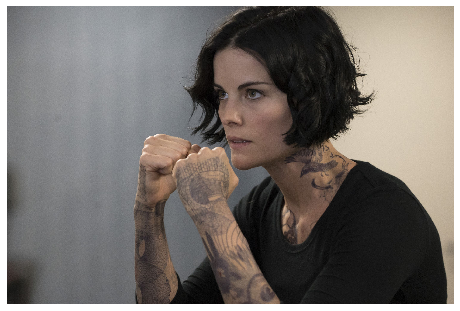

In [4]:
url = 'https://wallsdesk.com/wp-content/uploads/2017/01/Jaimie-Alexander-Wallpapers-HD.jpg' #@param {type:"string"}

response = requests.get(url)
img = PIL.Image.open(BytesIO(response.content)).convert("RGB")
img_t = T.ToTensor()(img)
img_fast = Image(img_t)
show_image(img_fast, figsize=(8, 8), interpolation='nearest');

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\torch\nn\functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


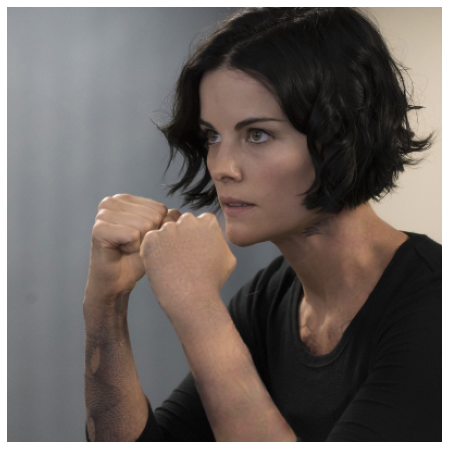

In [5]:
_, img_hr, _ = learn.predict(img_fast)
Image(img_hr).show(figsize=(8, 8))

# **Recommended image sources**

---



https://www.businessinsider.com.au/celebrities-with-face-tattoos-photos-2020-4

https://line.17qq.com/articles/qcstcqcqx.html

https://wallpapercave.com/dwayne-johnson-hd-wallpapers

https://www.dailymail.co.uk/news/article-1332455/
Why-ALL-sports-stars-adorn-tattoos.html

https://www.tattoodo.com/a/the-meaning-behind-modern-day-raps-most-iconic-face-tattoos-150021

https://www.businessinsider.in/sports/an-nfl-player-got-a-tattoo-on-his-face-to-keep-himself-from-ever-getting-a-normal-job/articleshow/41535043.cms

https://infosportsnow.com/home/2018/12/11/athletes-with-face-tattoos